# beviljade ansökningar för kurser 2024 och 2023

In [24]:
import pandas as pd
import duckdb

xls = pd.ExcelFile("data/resultat-2024-for-kurser-inom-yh (1).xlsx")

print(xls.sheet_names)


['Lista ansökningar', 'Beviljade ansökningar', 'Lista flera kommuner', 'Definitioner och förklaringar']


In [25]:
df_resultat_2024 = pd.read_excel("data/resultat-2024-for-kurser-inom-yh (1).xlsx", sheet_name="Lista ansökningar")

df_resultat_2024.head()

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Avslag,Changemaker Educations AB,Futuregames Accessible Game Production,Juridik,0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Avslag,Changemaker Educations AB,Futuregames Inclusive Game Development,"Ekonomi, administration och försäljning",0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Avslag,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Avslag,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Avslag,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [26]:
print("Dataframe shape:", df_resultat_2024.shape)

Dataframe shape: (880, 16)


In [27]:
print(df_resultat_2024.columns)

Index(['Diarienummer', 'Beslut', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Antal beviljade platser start 2024',
       'Antal beviljade platser start och slut 2024',
       'Antal beviljade platser start 2025', 'Totalt antal beviljade platser',
       'YH-poäng', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län',
       'Antal FA-regioner'],
      dtype='object')


In [28]:
df_resultat_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Diarienummer                                 880 non-null    object
 1   Beslut                                       880 non-null    object
 2   Anordnare namn                               880 non-null    object
 3   Utbildningsnamn                              880 non-null    object
 4   Utbildningsområde                            880 non-null    object
 5   Antal beviljade platser start 2024           880 non-null    int64 
 6   Antal beviljade platser start och slut 2024  880 non-null    int64 
 7   Antal beviljade platser start 2025           880 non-null    int64 
 8   Totalt antal beviljade platser               880 non-null    int64 
 9   YH-poäng                                     880 non-null    int64 
 10  Kommun        

In [29]:
df_resultat_2024.describe()

,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Antal kommuner,Antal län,Antal FA-regioner
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,9.462500,8.592045,9.171591,27.226136,41.563636,1.365909,1.343182,1.343182
std,17.835768,16.118678,17.092104,33.113759,19.014169,0.896319,0.862807,0.870682
min,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,16.500000,40.000000,1.000000,1.000000,1.000000
75%,2.500000,4.750000,2.500000,48.500000,50.000000,1.000000,1.000000,1.000000
max,100.000000,80.000000,80.000000,160.000000,99.000000,5.000000,5.000000,5.000000


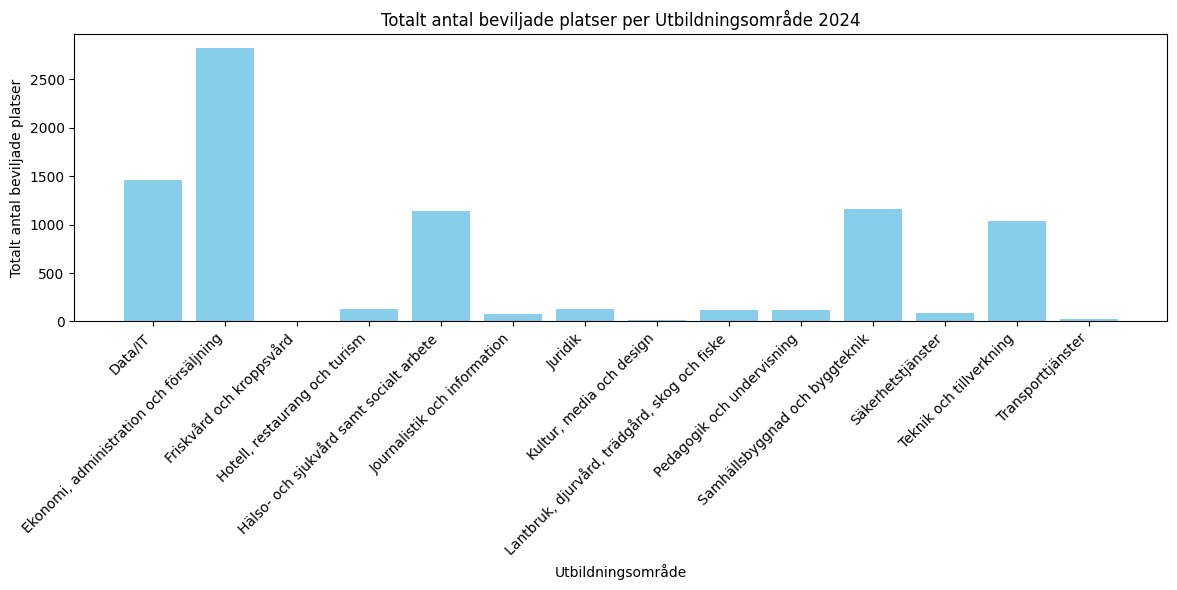

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


agg_data = df_resultat_2024.groupby("Utbildningsområde")["Antal beviljade platser start 2024"].sum().reset_index()


plt.figure(figsize=(12, 6))


plt.bar(agg_data["Utbildningsområde"], agg_data["Antal beviljade platser start 2024"], color="skyblue")

plt.xlabel("Utbildningsområde")
plt.ylabel("Totalt antal beviljade platser")
plt.title("Totalt antal beviljade platser per Utbildningsområde 2024")


plt.xticks(rotation=45, ha="right")


plt.tight_layout()


plt.show()

In [31]:
import pandas as pd
import plotly.express as px


agg_data = df_resultat_2024.groupby("Utbildningsområde")["Antal beviljade platser start 2024"].sum().reset_index()


fig = px.bar(
    agg_data,
    x="Utbildningsområde",
    y="Antal beviljade platser start 2024",
    title="Totalt antal beviljade platser per Utbildningsområde 2024",
    labels={
        "Utbildningsområde": "Utbildningsområde",
        "Antal beviljade platser start 2024": "Totalt antal beviljade platser"
    }
)


fig.update_layout(
    xaxis_tickangle=-45,
    height=600
)

fig.show()

In [32]:
# total antalet beviljade kurser år 2024
approved_2024 = df_resultat_2024[(df_resultat_2024["Beslut"] == "Beviljad")]

total_approved = approved_2024.shape[0]

print("Totala antalet beviljade utbildningar 2024:", total_approved)

Totala antalet beviljade utbildningar 2024: 451


In [33]:
# total antalet beviljade platser 2024
total_beviljade = df_resultat_2024["Antal beviljade platser start 2024"].sum()

print("Totala antalet beviljade platser 2024:", total_beviljade)

Totala antalet beviljade platser 2024: 8327


In [34]:
total_sokta_2024 = 15106
beviljandegrad = (total_beviljade / total_sokta_2024) * 100
print("Beviljandegrad: {:.2f}%".format(beviljandegrad))



Beviljandegrad: 55.12%


In [35]:
xls_2023 = pd.ExcelFile("data/resultat-2023-for-kurser-inom-yh.xlsx")

print(xls_2023.sheet_names)

['Lista ansökningar', 'Lista flera kommuner', 'Definitioner och förklaringar']


In [36]:
df_resultat_2023 = pd.read_excel("data/resultat-2023-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")

df_resultat_2023.head()

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser 2023,Antal beviljade platser 2024,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2023/1049,Avslag,"Olofströms kommun, Yrkeshögskolan Syd",Hållbar Produktionsutveckling,Teknik och tillverkning,0,0,0,90,Olofström,Blekinge,Karlskrona,1,1,1
1,MYH 2023/1077,Avslag,YrkesAkademin YH AB,Smarta byggnader - Fastighetsautomation,Samhällsbyggnad och byggteknik,0,0,0,45,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2023/1080,Beviljad,Nyköpings kommun - Flygteknik technical training,El- och avioniktekniker,Teknik och tillverkning,0,15,15,99,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1
3,MYH 2023/1082,Beviljad,Handelsakademin i Göteborg AB,Cloud Development,Data/IT,40,40,80,70,Göteborg,Västra Götaland,Göteborg,1,1,1
4,MYH 2023/1083,Avslag,Handelsakademin i Göteborg AB,Testautomatisering med Python,Data/IT,0,0,0,70,Göteborg,Västra Götaland,Göteborg,1,1,1


In [37]:
print("Dataframe shape:", df_resultat_2023.shape)

Dataframe shape: (280, 15)


In [38]:
print(df_resultat_2023.columns)

Index(['Diarienummer', 'Beslut', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Antal beviljade platser 2023',
       'Antal beviljade platser 2024', 'Totalt antal beviljade platser',
       'YH-poäng', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län',
       'Antal FA-regioner'],
      dtype='object')


In [39]:
df_resultat_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Diarienummer                    280 non-null    object
 1   Beslut                          280 non-null    object
 2   Anordnare namn                  280 non-null    object
 3   Utbildningsnamn                 280 non-null    object
 4   Utbildningsområde               280 non-null    object
 5   Antal beviljade platser 2023    280 non-null    int64 
 6   Antal beviljade platser 2024    280 non-null    int64 
 7   Totalt antal beviljade platser  280 non-null    int64 
 8   YH-poäng                        280 non-null    int64 
 9   Kommun                          280 non-null    object
 10  Län                             280 non-null    object
 11  FA-region                       280 non-null    object
 12  Antal kommuner                  280 non-null    in

In [40]:
df_resultat_2023.describe()

,Antal beviljade platser 2023,Antal beviljade platser 2024,Totalt antal beviljade platser,YH-poäng,Antal kommuner,Antal län,Antal FA-regioner
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,11.567857,22.525000,34.092857,46.850000,1.264286,1.239286,1.235714
std,17.443890,26.489318,40.714303,23.527282,0.724489,0.715842,0.699316
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
75%,30.000000,40.000000,70.000000,60.000000,1.000000,1.000000,1.000000
max,80.000000,120.000000,200.000000,99.000000,5.000000,5.000000,5.000000


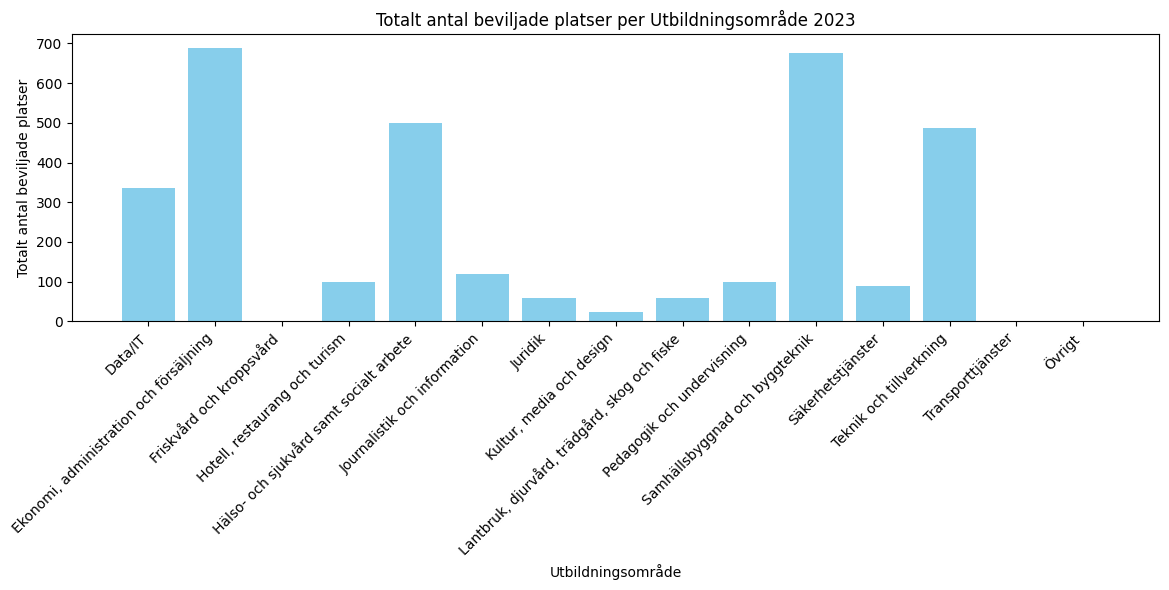

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


agg_data = df_resultat_2023.groupby("Utbildningsområde")["Antal beviljade platser 2023"].sum().reset_index()


plt.figure(figsize=(12, 6))


plt.bar(agg_data["Utbildningsområde"], agg_data["Antal beviljade platser 2023"], color="skyblue")

plt.xlabel("Utbildningsområde")
plt.ylabel("Totalt antal beviljade platser")
plt.title("Totalt antal beviljade platser per Utbildningsområde 2023")


plt.xticks(rotation=45, ha="right")


plt.tight_layout()


plt.show()

In [42]:
import pandas as pd
import plotly.express as px


agg_data = df_resultat_2023.groupby("Utbildningsområde")["Antal beviljade platser 2023"].sum().reset_index()


fig = px.bar(
    agg_data,
    x="Utbildningsområde",
    y="Antal beviljade platser 2023",
    title="Totalt antal beviljade platser per Utbildningsområde 2023",
    labels={
        "Utbildningsområde": "Utbildningsområde",
        "Antal beviljade platser 2023": "Totalt antal beviljade platser"
    }
)


fig.update_layout(
    xaxis_tickangle=-45,
    height=600
)

fig.show()

In [43]:
# total antalet beviljade kurser år 2023
approved_2023 = df_resultat_2023[(df_resultat_2023["Beslut"] == "Beviljad")]

total_approved = approved_2023.shape[0]

print("Totala antalet beviljade utbildningar 2023:", total_approved)

Totala antalet beviljade utbildningar 2023: 139


In [44]:
# total antalet beviljade platser 2023
total_beviljade = df_resultat_2023["Antal beviljade platser 2023"].sum()

print("Totala antalet beviljade platser 2023:", total_beviljade)

Totala antalet beviljade platser 2023: 3239


In [45]:
total_sokta_2023 = 15106
beviljandegrad = (total_beviljade / total_sokta_2023) * 100
print("Beviljandegrad: {:.2f}%".format(beviljandegrad))

Beviljandegrad: 21.44%


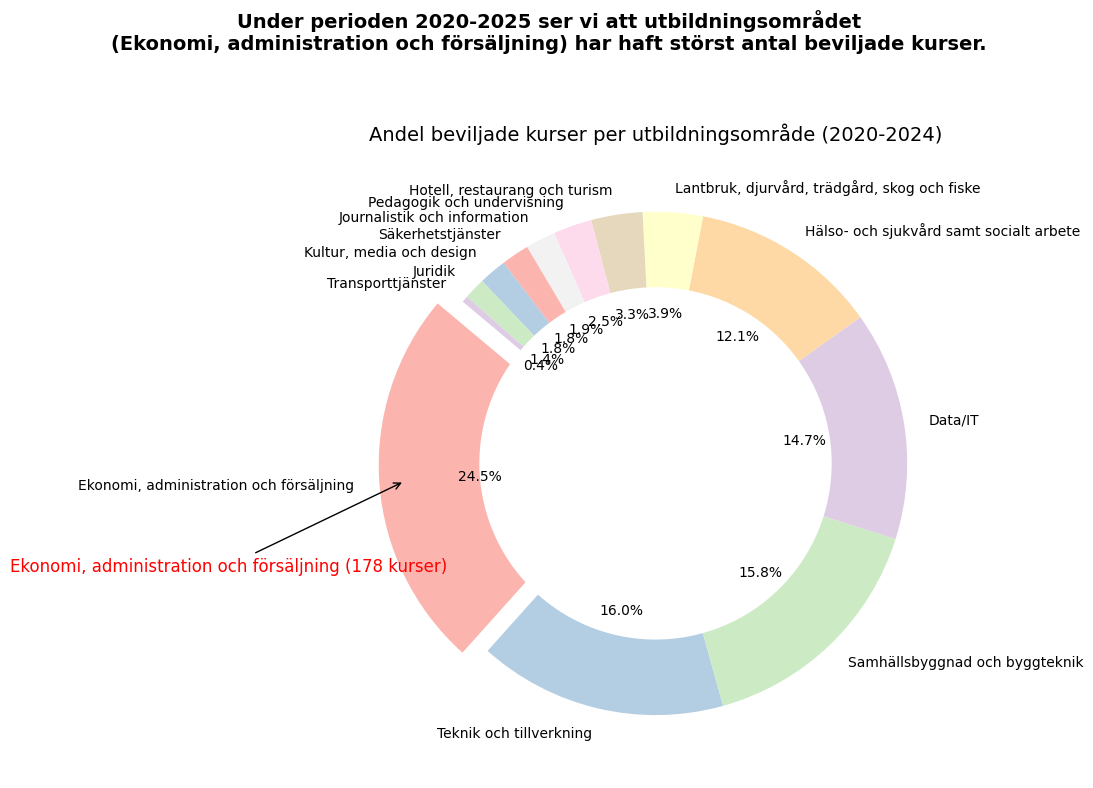

In [46]:
import numpy as np

# Läs in Excel-filerna från mappen "../data/" (notebook ligger i mappen "EDA", data är en sibling)
df2024 = pd.read_excel("../data/resultat-2024-for-kurser-inom-yh (1).xlsx", sheet_name="Lista ansökningar")
df2023 = pd.read_excel("../data/resultat-2023-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")
df2022 = pd.read_excel("../data/resultat-2022-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")
df2021 = pd.read_excel("../data/resultat-juni-2021-for-korta-utbildningar-kurser-och-kurspaket.xlsx", sheet_name="Lista beviljade ansökningar")
df2020 = pd.read_excel("../data/ANS_L12_Beviljade-korta-utb-kurser-kurspaket-YH-juli-2020-2.xlsx", sheet_name="Lista beviljade utbildningar")

# Kombinera data från alla år
df_all = pd.concat([df2024, df2023, df2022, df2021, df2020], ignore_index=True)

# Om kolumnen "Beslut" finns, filtrera så att endast rader med "Beviljad" inkluderas, annars anta att alla rader är beviljade
if "Beslut" in df_all.columns:
    df_all = df_all[df_all["Beslut"] == "Beviljad"]

# Gruppdata efter "Utbildningsområde" och räkna totalt antal beviljade kurser
grouped = df_all.groupby("Utbildningsområde").size().reset_index(name="Total beviljade kurser")
grouped = grouped.sort_values("Total beviljade kurser", ascending=False)

# Identifiera det utbildningsområde med flest beviljade kurser
top_area = grouped.iloc[0]["Utbildningsområde"]
top_count = grouped.iloc[0]["Total beviljade kurser"]

# Förbered data för donut chart
labels = grouped["Utbildningsområde"]
sizes = grouped["Total beviljade kurser"]
explode = [0.1 if label == top_area else 0 for label in labels]

# Rita en donut chart med matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    explode=explode, colors=plt.cm.Pastel1.colors
)
ax.set_title("Andel beviljade kurser per utbildningsområde (2020-2024)", fontsize=14)

# Skapa en cirkel i mitten för att göra det till en donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Hitta vinkeln för det utbildningsområde med flest kurser
top_idx = labels.tolist().index(top_area)
theta1, theta2 = wedges[top_idx].theta1, wedges[top_idx].theta2
angle = (theta1 + theta2) / 2.0
x = np.cos(np.deg2rad(angle))
y = np.sin(np.deg2rad(angle))

# Lägg till annotering med pil för att markera det topp-baserade området.
# Placera annoteringen längre ut och justera y-positionen (flytta ner lite) så att texten inte överlappar andra etiketter.
ax.annotate(
    f"{top_area} ({top_count} kurser)",
    xy=(x, y),xytext=(1.5 * x - 0.2, 1.5 * y - 0.3),
    arrowprops=dict(facecolor='red', arrowstyle="->"),
    ha='center', va='center', fontsize=12, color="red"
)

# Lägg till två rader storytelling-text ovanför grafen
plt.suptitle(
    f"Under perioden 2020-2025 ser vi att utbildningsområdet\n({top_area}) har haft störst antal beviljade kurser.",
    fontsize=14,
    fontweight='bold',
    x=0.5,
    horizontalalignment='center'
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("../assets/images/donut_chart.png", dpi=300, bbox_inches="tight")
plt.show()